In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import random as random

In [17]:
df=pd.read_csv('checkpoint_3.csv')
df['ListingByYear'] = df.apply(lambda row: row.month[:4], axis = 1)
df['Leaseleft']=df['ListingByYear'].astype(float)-df['lease_commence_date'].astype(float)

display(df)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,closest_Uni_sch,num_Uni_sch_1km_radius,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear,Leaseleft
0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,...,Singapore Management University,0,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017,38.0
1,1,1,1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,...,Singapore University of Social Sciences,0,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017,39.0
2,2,2,2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,...,Singapore University of Social Sciences,0,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017,37.0
3,3,3,3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,...,Singapore Management University,0,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017,37.0
4,4,4,4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,...,Singapore University of Social Sciences,0,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149321,149321,149321,149321,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN CTRL,800000.0,2023-03,...,Singapore University of Social Sciences,0,432.877723,Junction Nine,2,279.490328,Yishun Pond Park,1,2023,35.0
149322,149322,149322,149322,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,800000.0,2023-03,...,Singapore University of Social Sciences,0,931.337725,Wisteria Mall,2,661.649827,Yishun Pond Park,1,2023,35.0
149323,149323,149323,149323,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN RING RD,770000.0,2023-03,...,Singapore Institute of Technology,0,739.745345,Junction Nine,1,825.343534,Yishun Pond Park,1,2023,35.0
149324,149324,149324,149324,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,818000.0,2023-03,...,Singapore University of Social Sciences,0,965.509600,Northpoint City,1,976.514291,Sembawang Park,1,2023,36.0


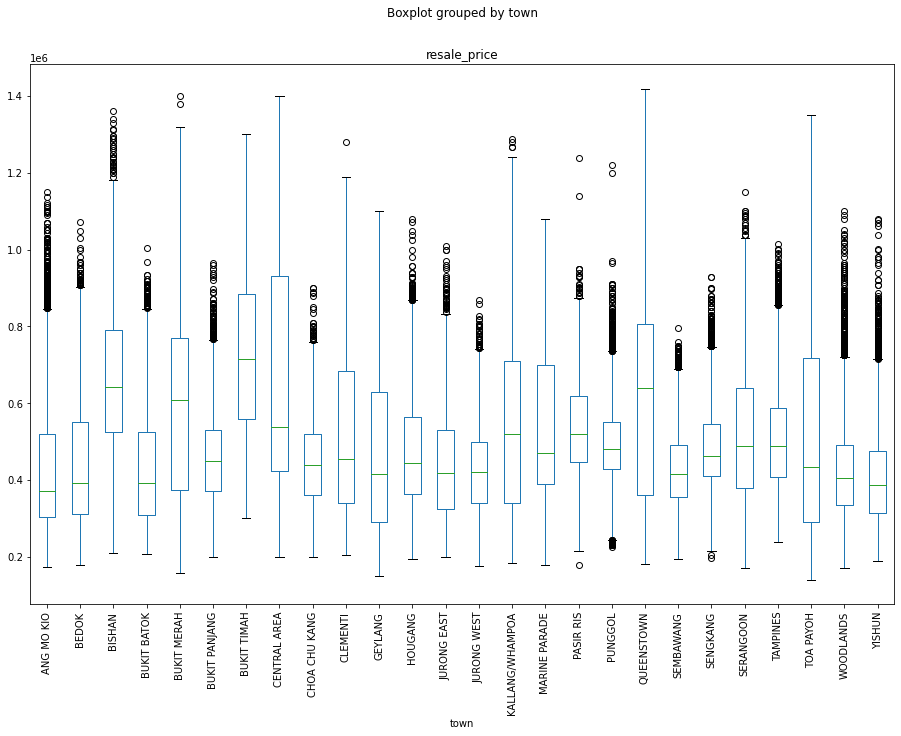

In [3]:
bpbytown=df.boxplot(by ='town', column =['resale_price'], grid = False, figsize =(15, 10))

plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

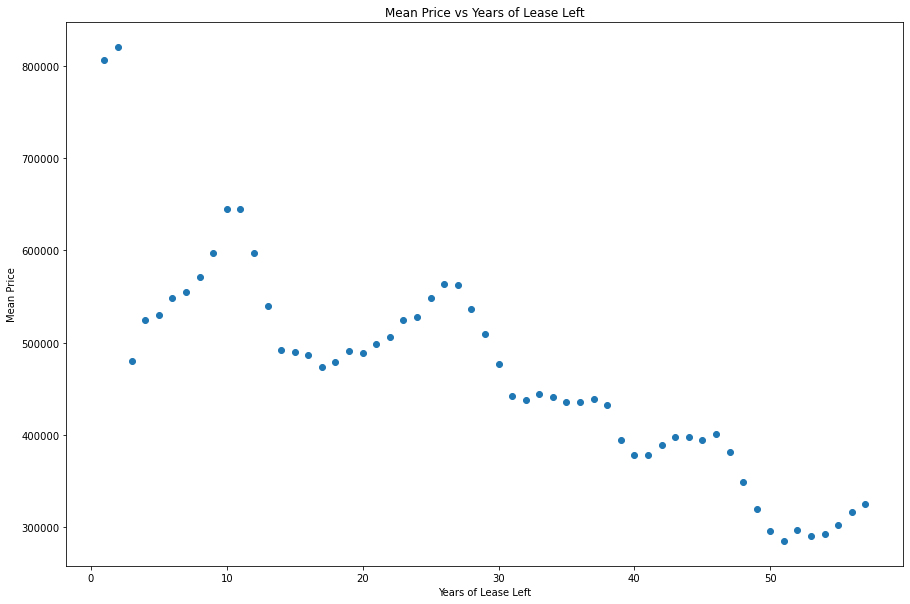

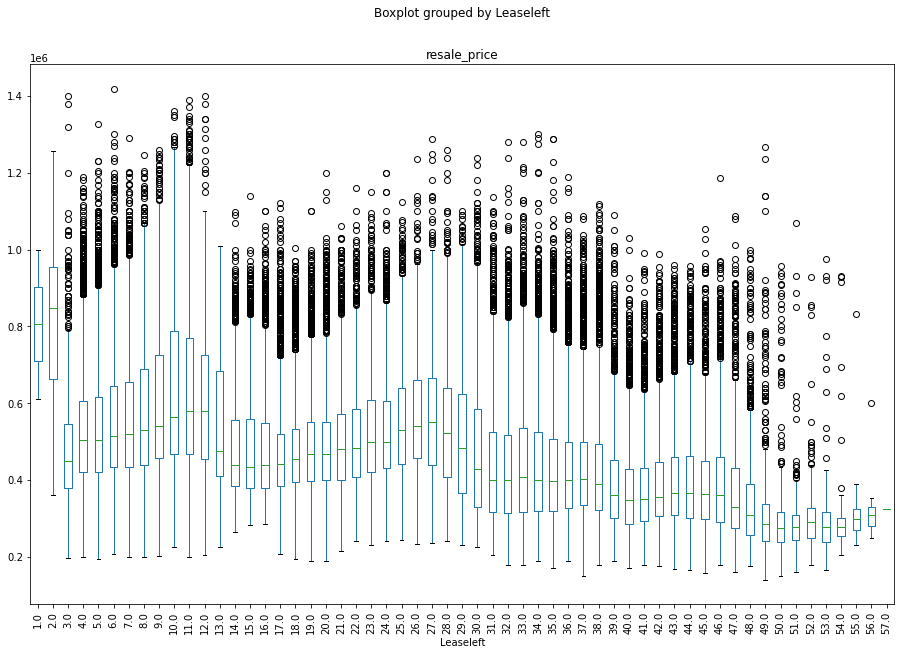

In [20]:
meanleasebyyear = df.groupby(['Leaseleft']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.scatter(meanleasebyyear.index,meanleasebyyear['resale_price'])
plt.title('Mean Price vs Years of Lease Left')
plt.ylabel('Mean Price')
plt.xlabel('Years of Lease Left')
plt.show()

leasebyyear=df.boxplot(by ='Leaseleft', column =['resale_price'], grid = False, figsize =(15, 10))
plt.xticks(rotation=90)
plt.show()

# display(meanleasebyyear)

<Figure size 432x288 with 0 Axes>

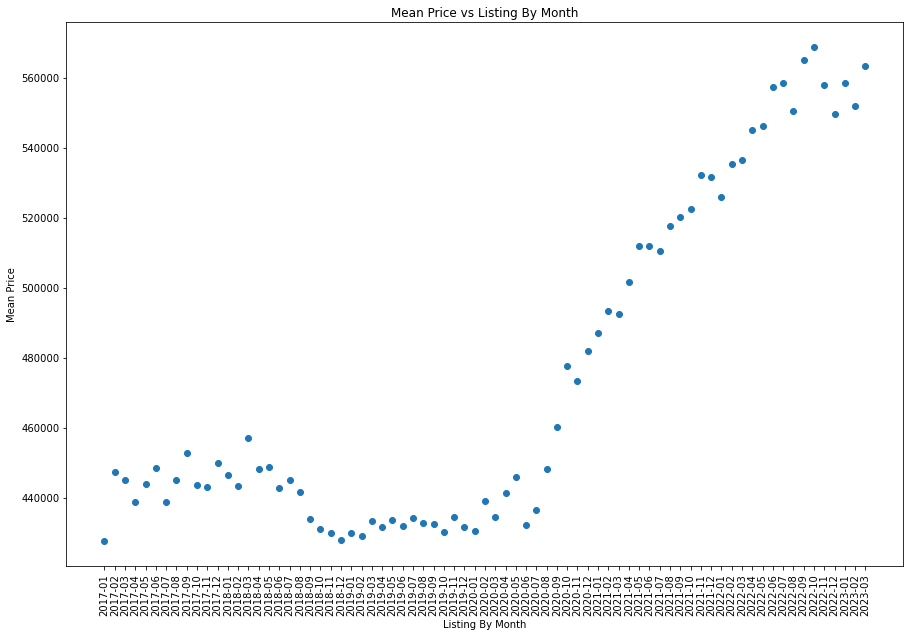

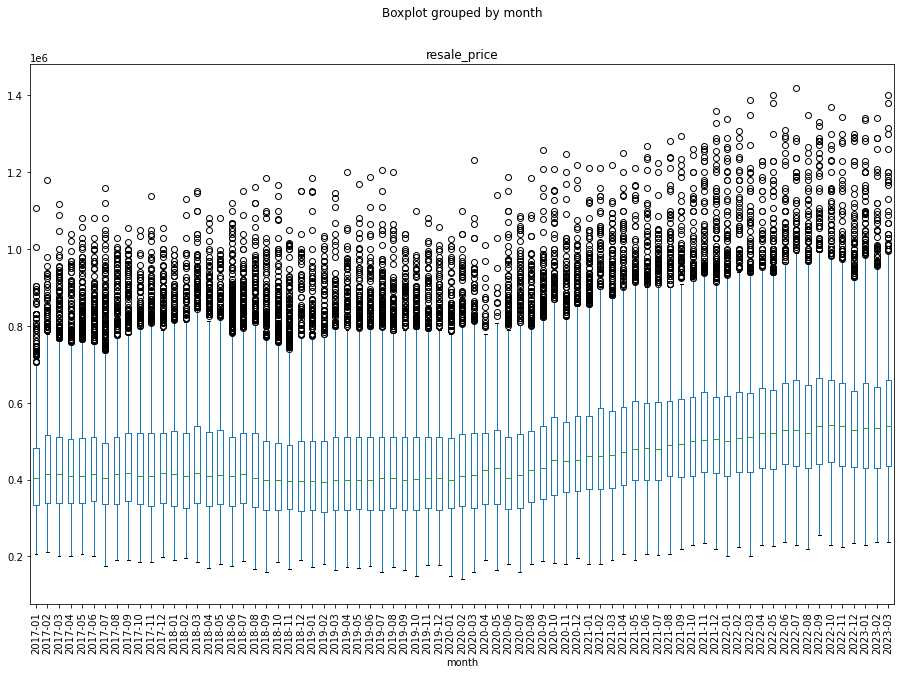

In [5]:
meanleasebymonth = df.groupby(['month']).aggregate(np.mean)

plt.clf()
plt.figure(figsize=(15,10))
plt.scatter(meanleasebymonth.index,meanleasebymonth['resale_price'])
plt.title('Mean Price vs Listing By Month')
plt.ylabel('Mean Price')
plt.xlabel('Listing By Month')
plt.xticks(rotation=90)
plt.show()

leasebymonthbp=df.boxplot(by ='month', column =['resale_price'], grid = False, figsize =(15, 10))
plt.xticks(rotation=90)
plt.show()

# display(meanleasebyyear)

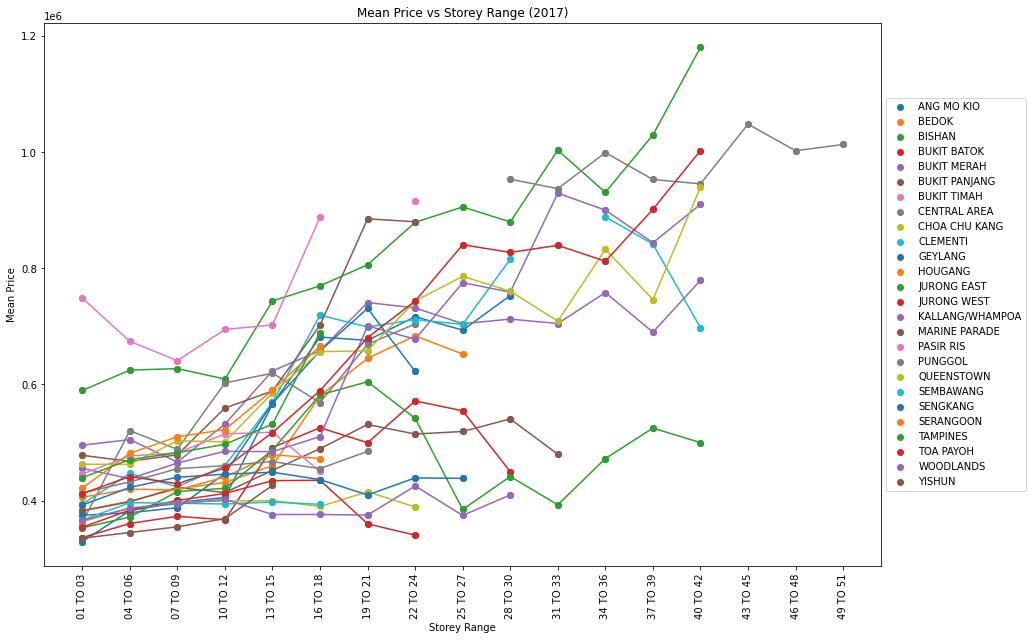

In [6]:
#Getting the storey_range and town graphs
df2017=df.loc[df['ListingByYear']=='2017']
# print(df2017['month'].unique())
meanpricebystorey = df2017.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2017)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2018-05' '2018-08' '2018-01' '2018-02' '2018-03' '2018-04' '2018-06'
 '2018-07' '2018-09' '2018-10' '2018-11' '2018-12']


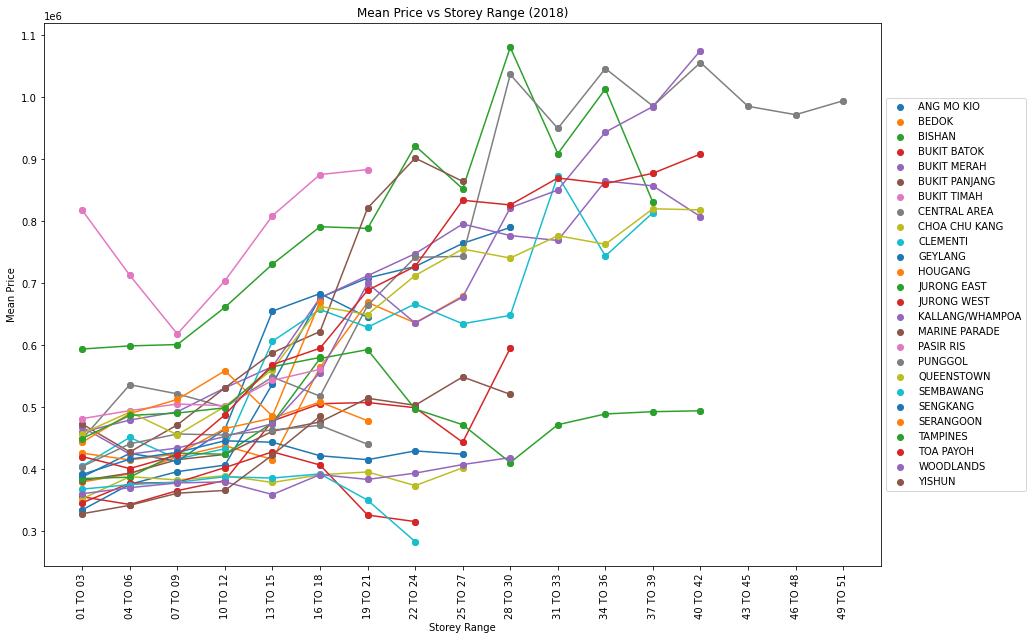

In [7]:
#Getting the storey_range and town graphs
df2018=df.loc[df['ListingByYear']=='2018']
print(df2018['month'].unique())
meanpricebystorey = df2018.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2018)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2019-04' '2019-01' '2019-02' '2019-03' '2019-05' '2019-06' '2019-07'
 '2019-08' '2019-09' '2019-10' '2019-11' '2019-12']


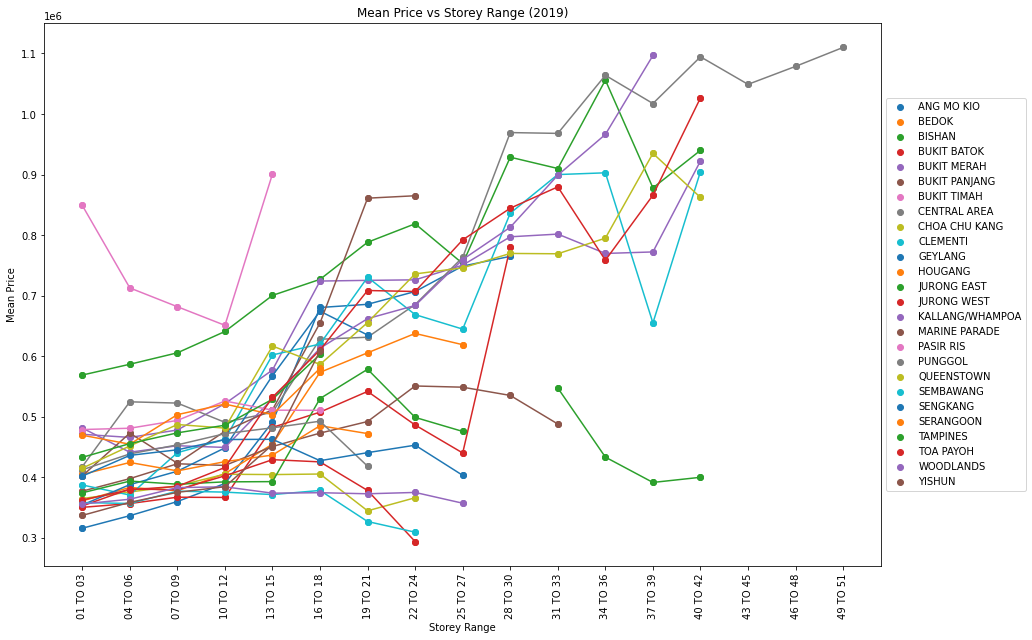

In [8]:
#Getting the storey_range and town graphs
df2019=df.loc[df['ListingByYear']=='2019']
print(df2019['month'].unique())
meanpricebystorey = df2019.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2019)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2020-04' '2020-08' '2020-01' '2020-02' '2020-03' '2020-05' '2020-06'
 '2020-07' '2020-09' '2020-10' '2020-11' '2020-12']


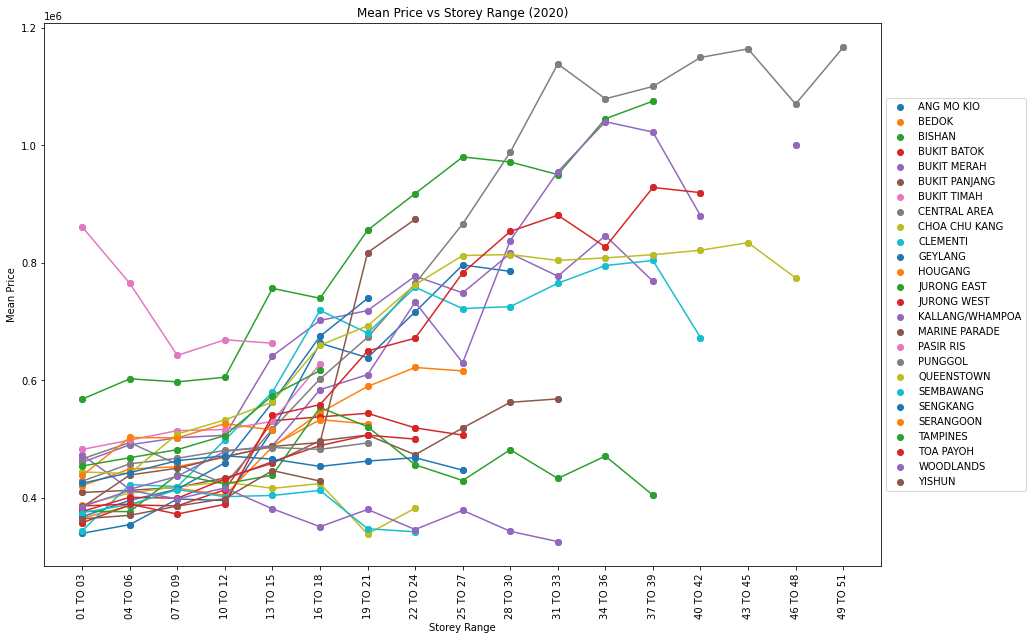

In [9]:
#Getting the storey_range and town graphs
df2020=df.loc[df['ListingByYear']=='2020']
print(df2020['month'].unique())
meanpricebystorey = df2020.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2020)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2021-01' '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07'
 '2021-08' '2021-09' '2021-10' '2021-11' '2021-12']


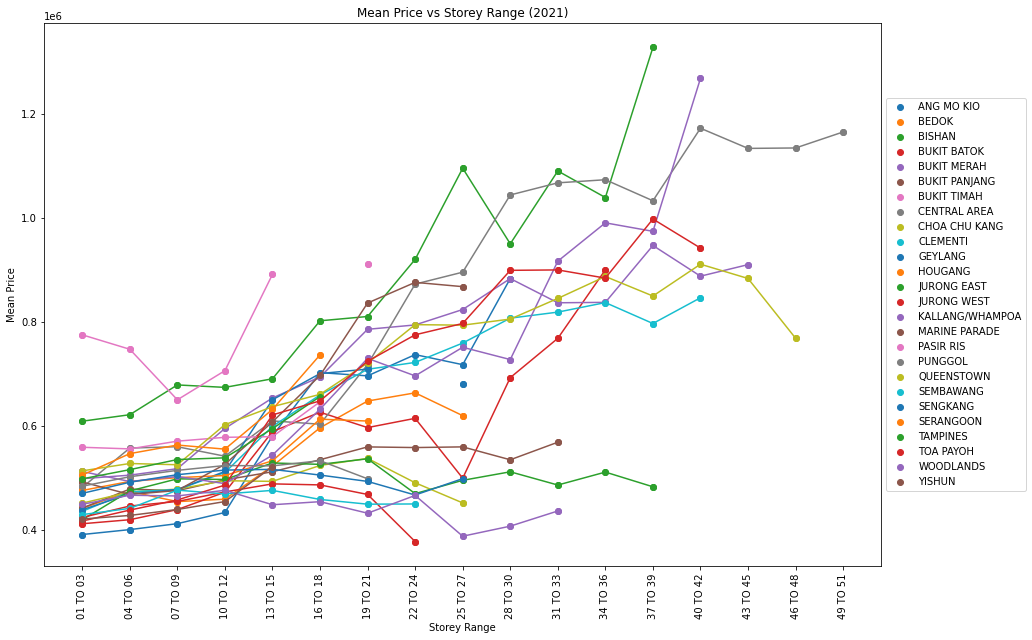

In [10]:
#Getting the storey_range and town graphs
df2021=df.loc[df['ListingByYear']=='2021']
print(df2021['month'].unique())
meanpricebystorey = df2021.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2021)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2022-04' '2022-01' '2022-02' '2022-03' '2022-05' '2022-06' '2022-07'
 '2022-08' '2022-09' '2022-10' '2022-11' '2022-12']


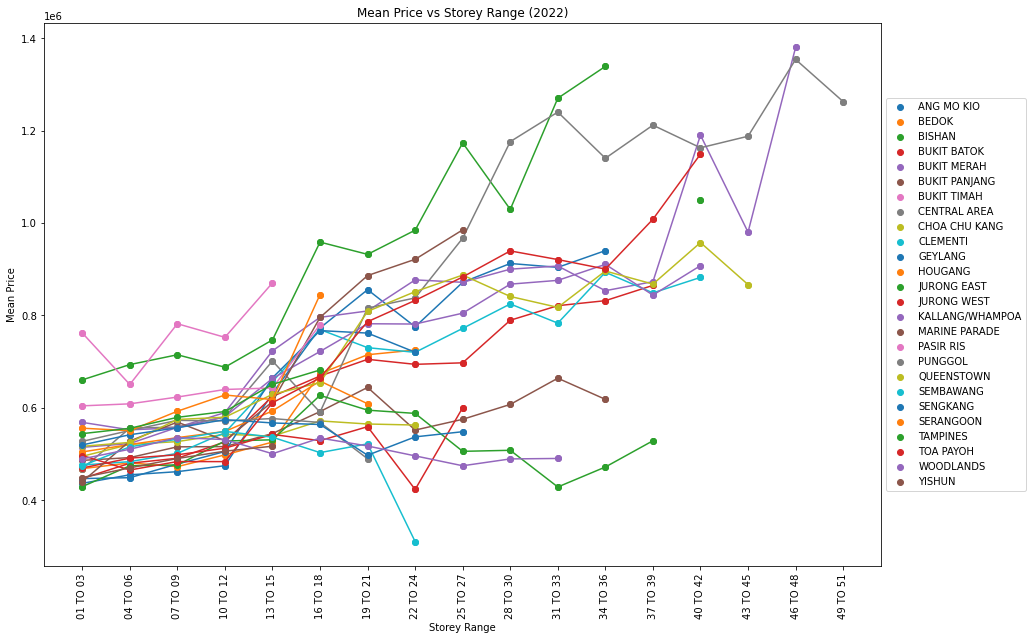

In [11]:
#Getting the storey_range and town graphs
df2022=df.loc[df['ListingByYear']=='2022']
print(df2022['month'].unique())
meanpricebystorey = df2022.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.scatter(newdf.index, newdf[i], label=i)
    plt.plot(newdf.index, newdf[i], '-o')


plt.title('Mean Price vs Storey Range (2022)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2023-02' '2023-01' '2023-03']


<Figure size 432x288 with 0 Axes>

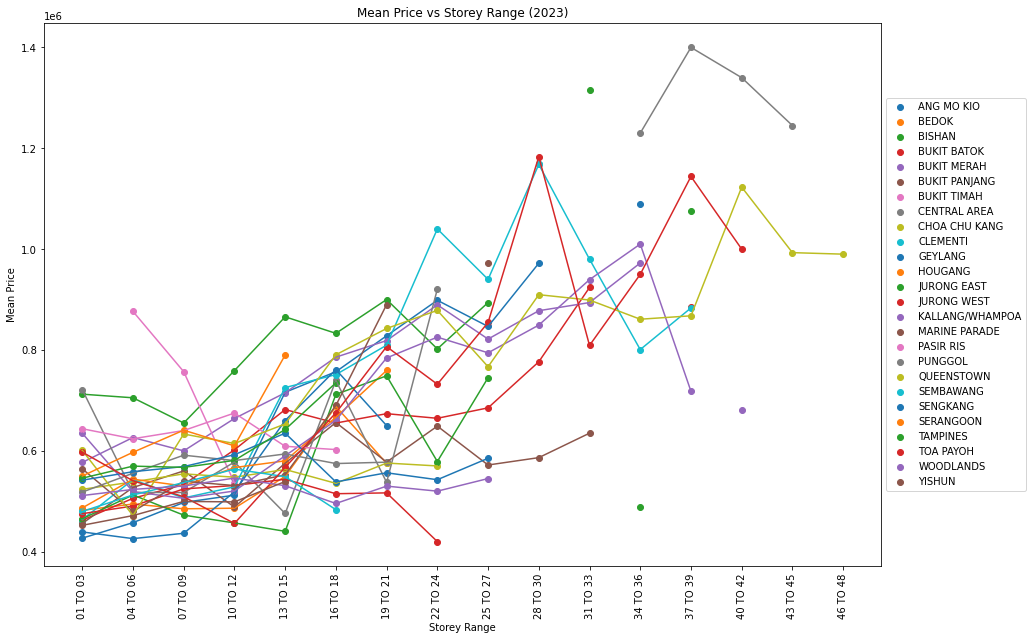

In [12]:
#Getting the storey_range and town graphs
df2023=df.loc[df['ListingByYear']=='2023']
print(df2023['month'].unique())
meanpricebystorey = df2023.groupby(['storey_range','town']).aggregate(np.mean)
# display(meanpricebystorey['resale_price'])

newdf=meanpricebystorey['resale_price'].unstack(level=1)
# display(newdf)
# print(newdf.index)

#Plot the graphs
plt.clf()
plt.figure(figsize=(15,10))
#Taking it by storey range
for i in newdf.columns:
    plt.plot(newdf.index, newdf[i])
    plt.scatter(newdf.index, newdf[i], label=i)
    


plt.title('Mean Price vs Storey Range (2023)')
plt.ylabel('Mean Price')
plt.xlabel('Storey Range')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
plt.xticks(rotation=90)
plt.show()

# plt.figure(figsize=(15,10))
# for i in newdf.index:
#     plt.scatter(i,newdf[i])

# plt.show()
# display(meanleasebyyear)

['2023-02' '2023-01' '2023-03']


<Figure size 432x288 with 0 Axes>

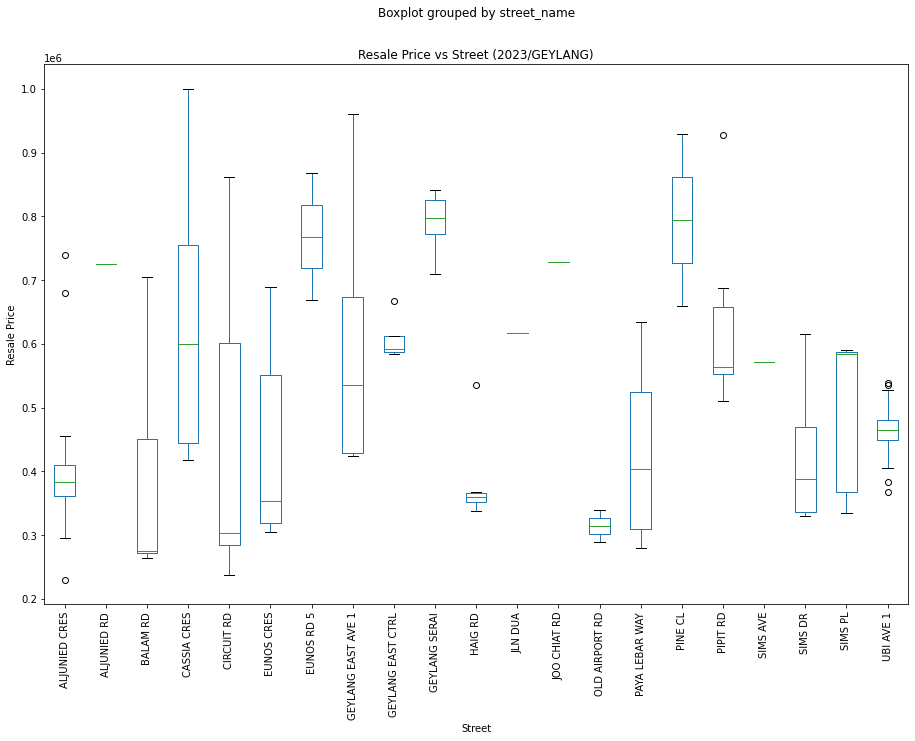

<Figure size 432x288 with 0 Axes>

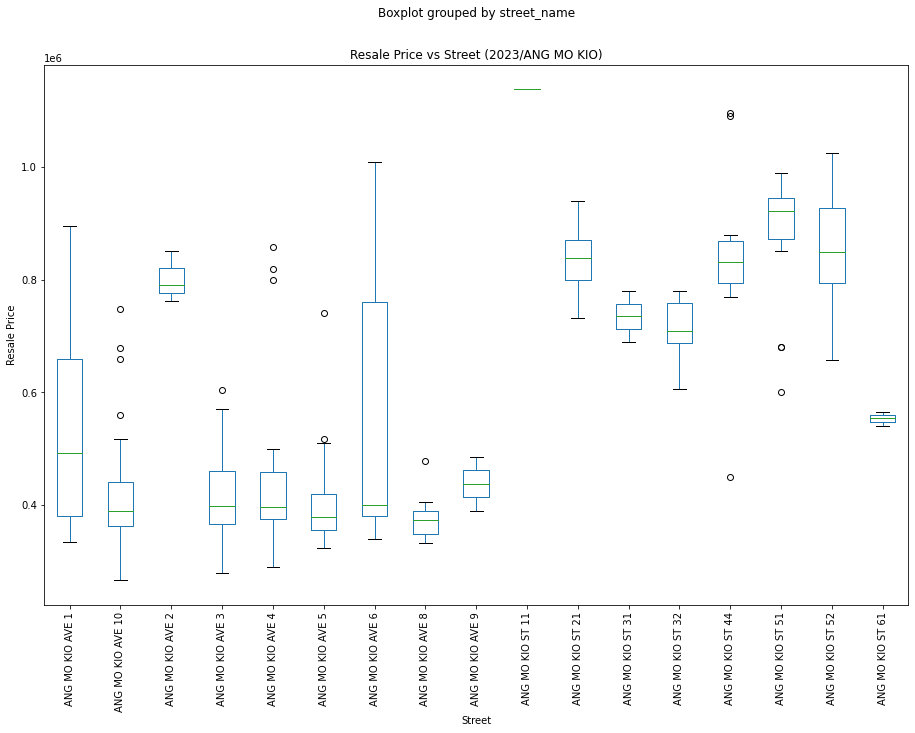

<Figure size 432x288 with 0 Axes>

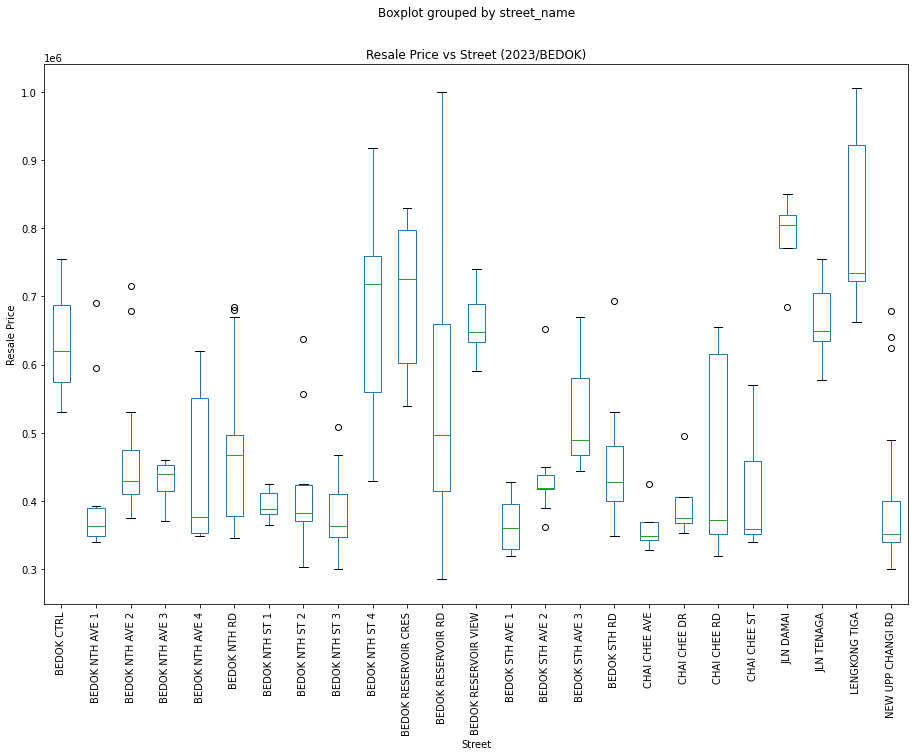

<Figure size 432x288 with 0 Axes>

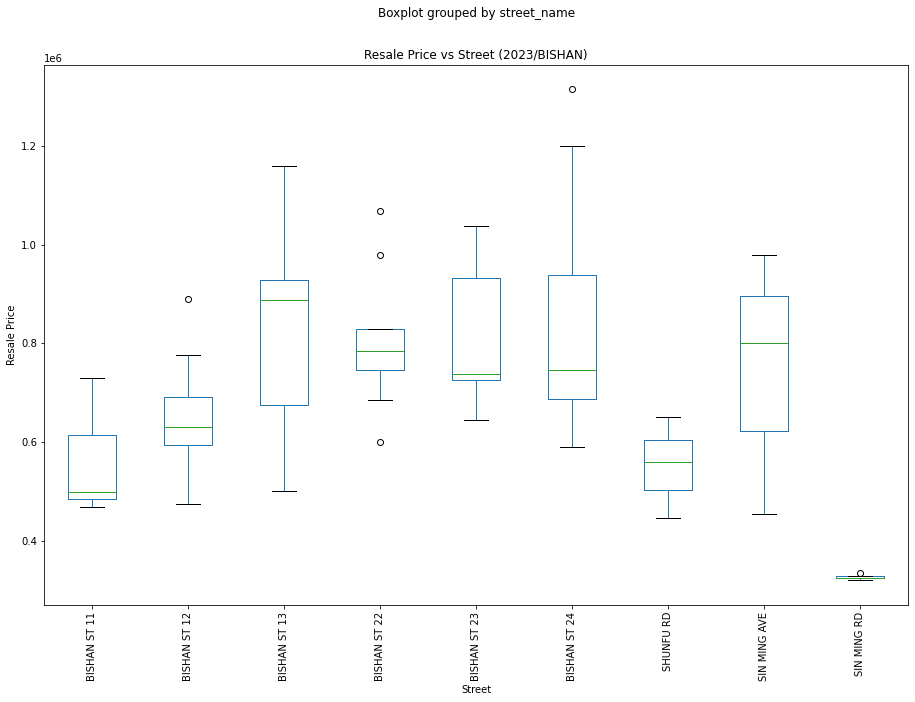

<Figure size 432x288 with 0 Axes>

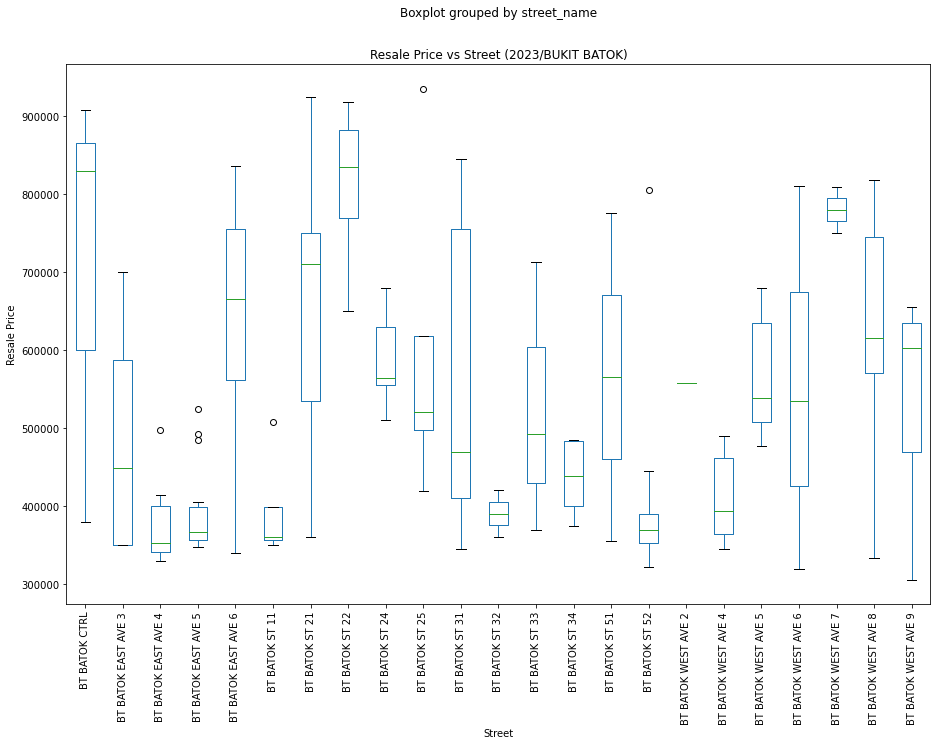

<Figure size 432x288 with 0 Axes>

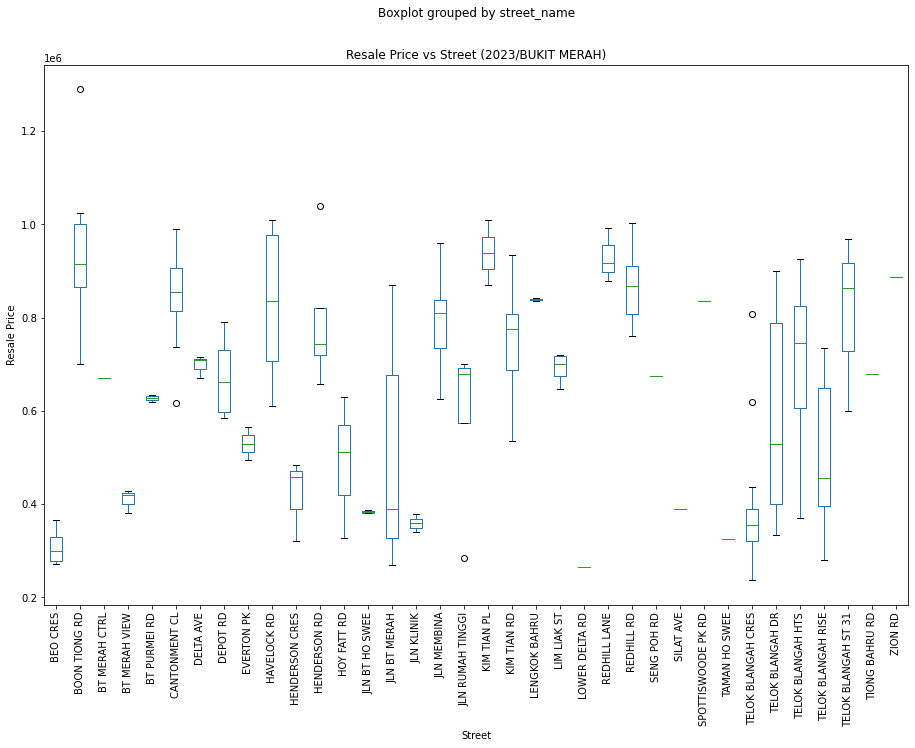

<Figure size 432x288 with 0 Axes>

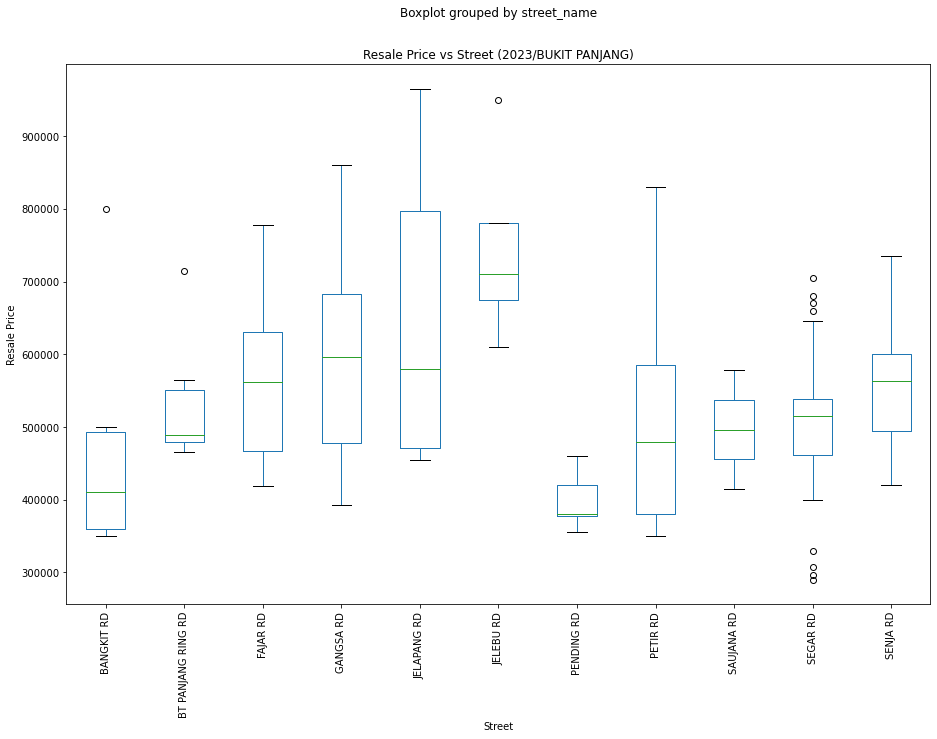

<Figure size 432x288 with 0 Axes>

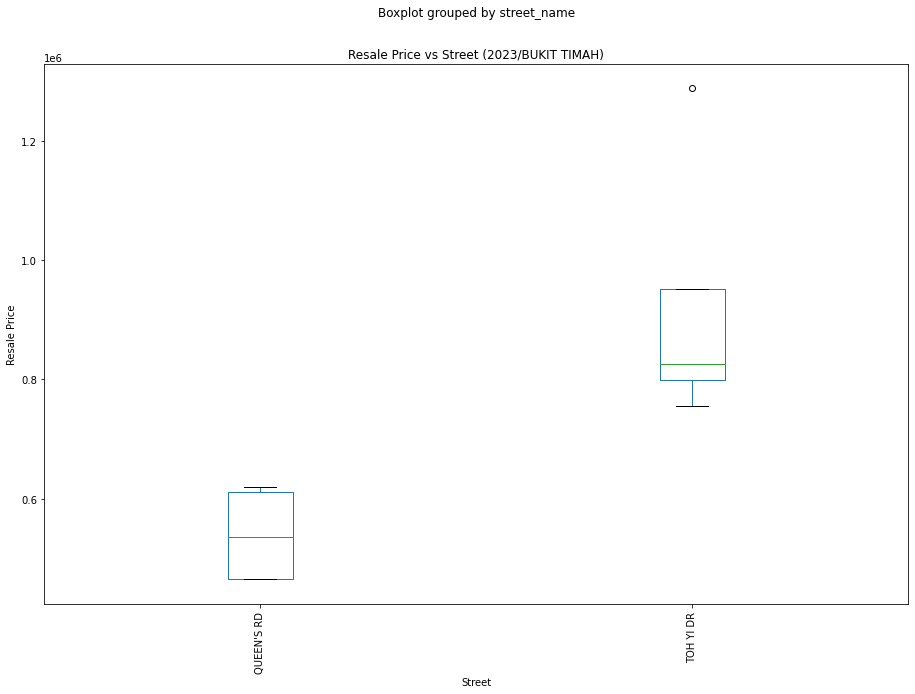

<Figure size 432x288 with 0 Axes>

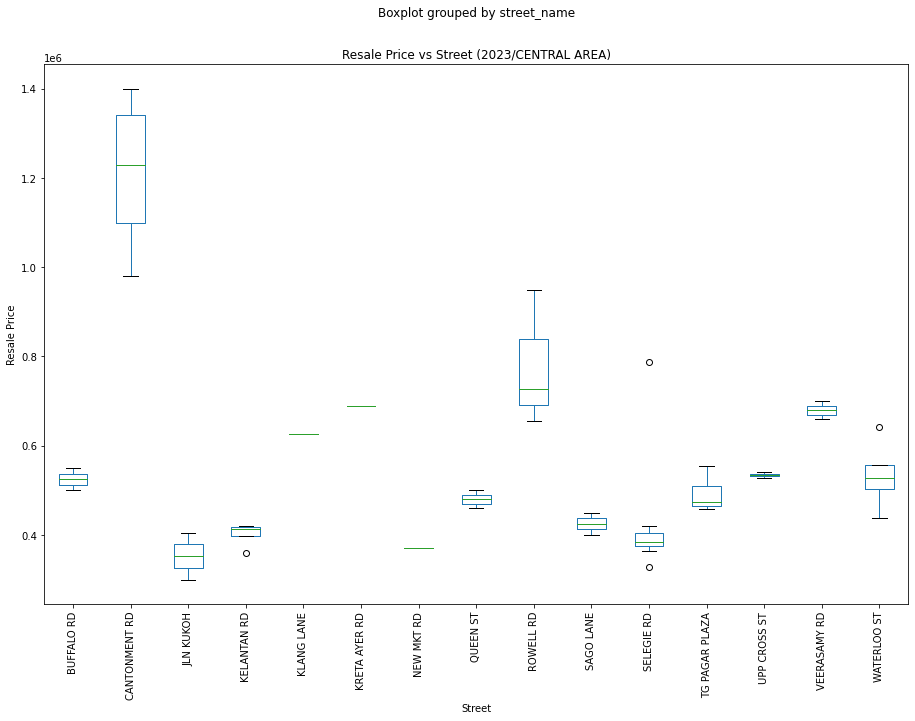

<Figure size 432x288 with 0 Axes>

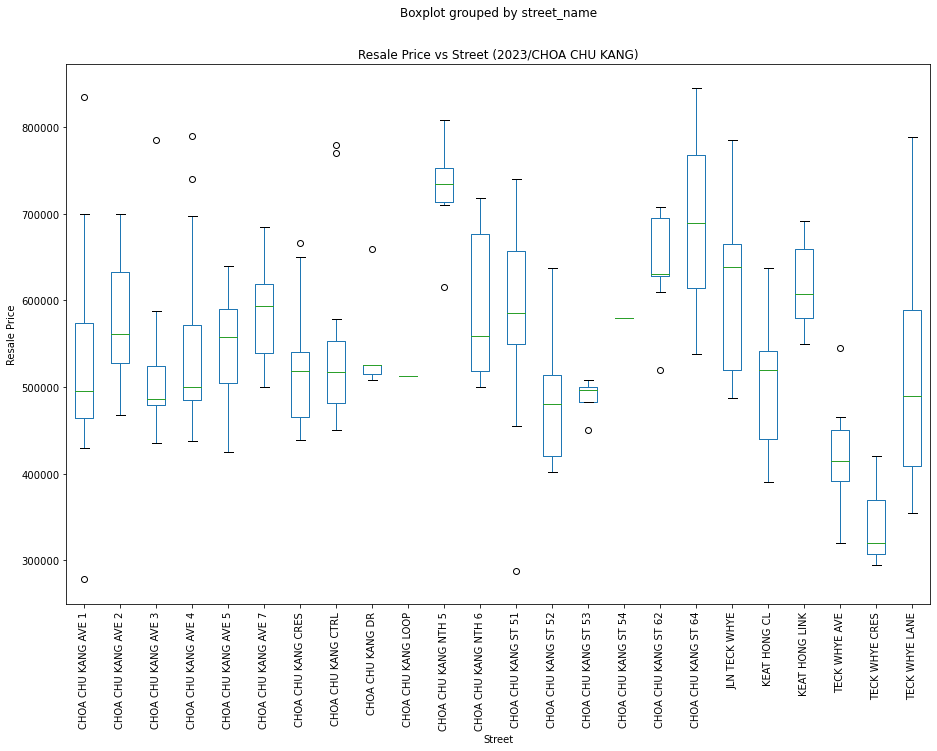

<Figure size 432x288 with 0 Axes>

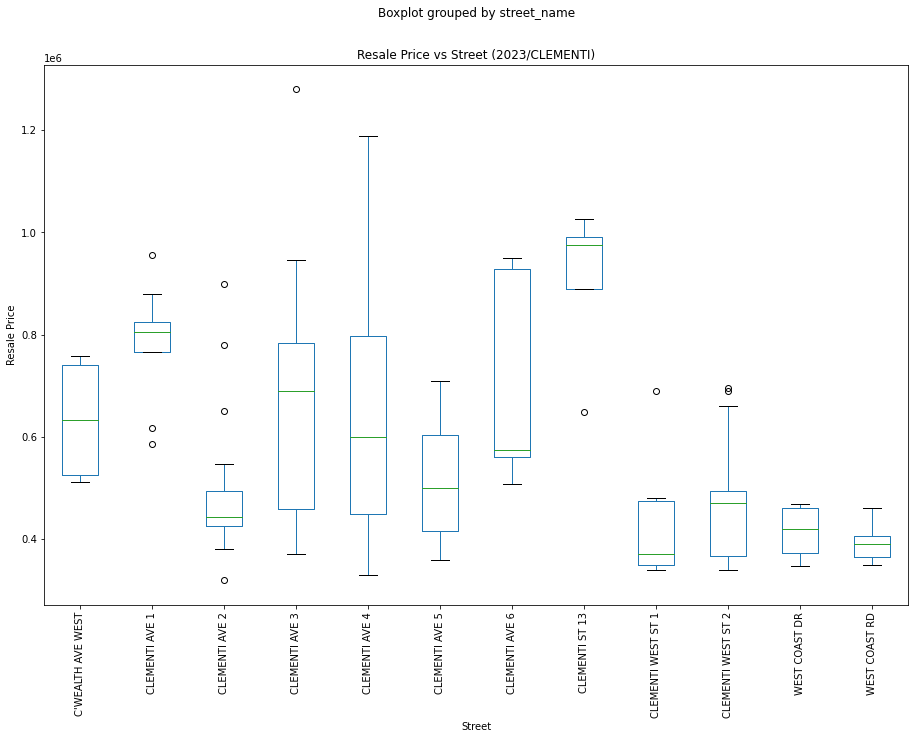

<Figure size 432x288 with 0 Axes>

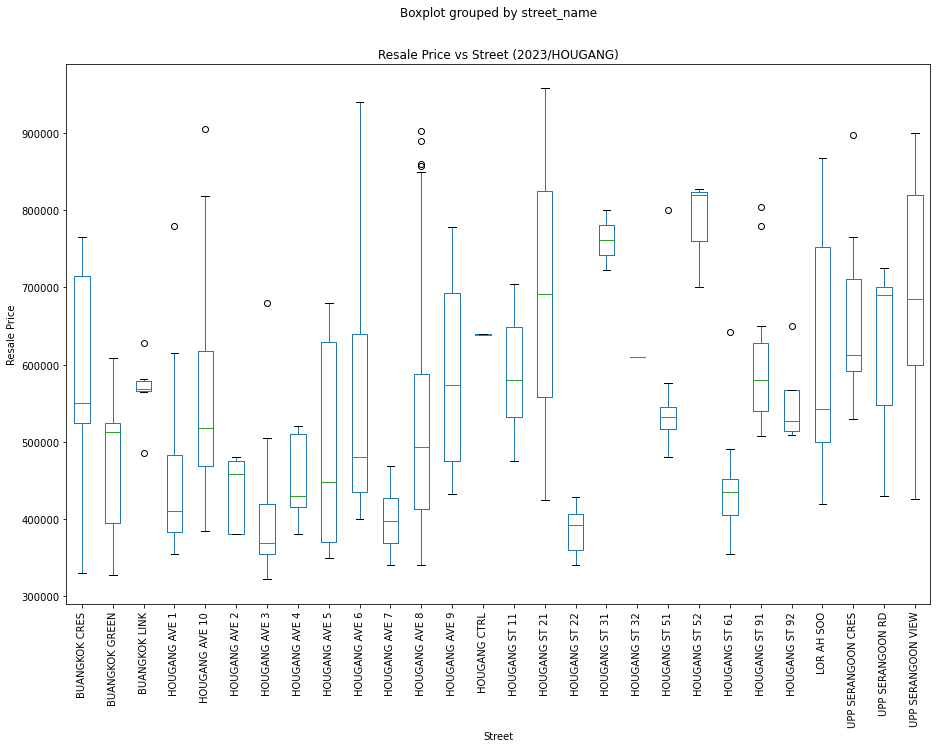

<Figure size 432x288 with 0 Axes>

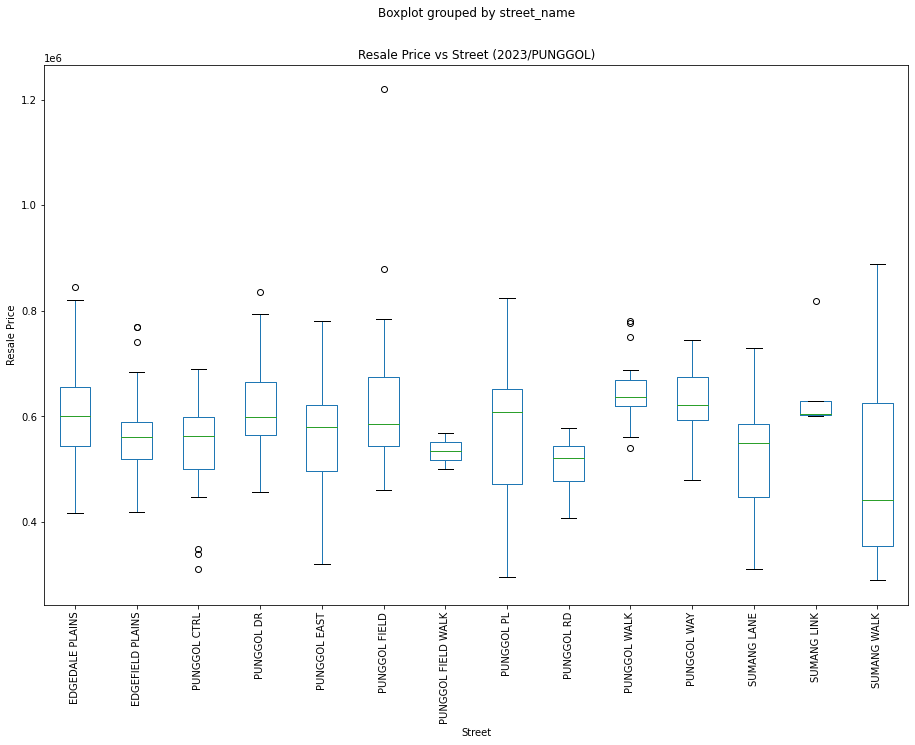

<Figure size 432x288 with 0 Axes>

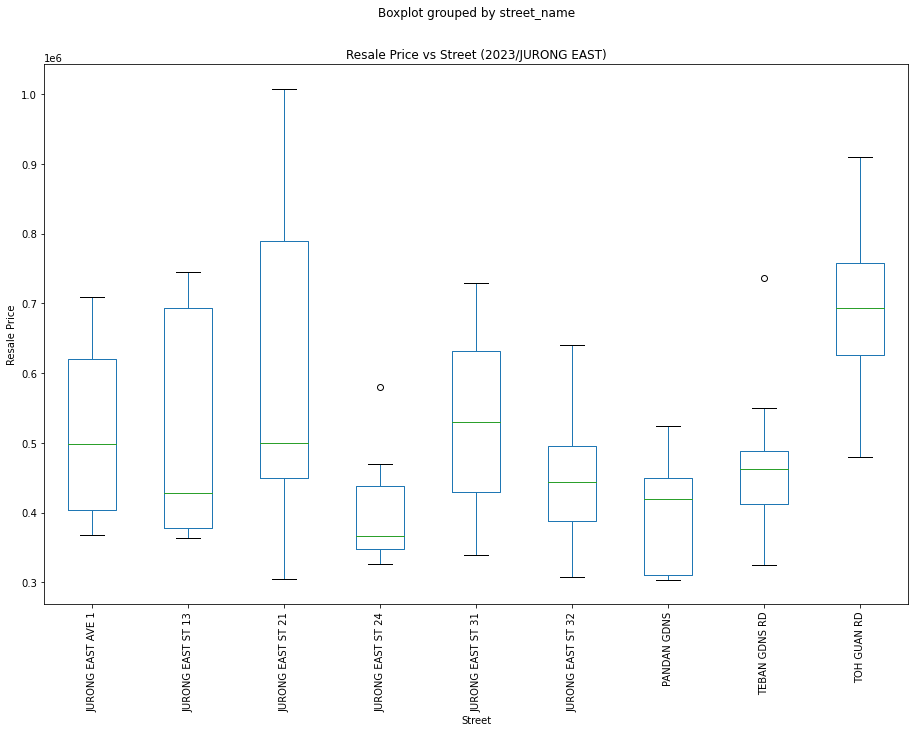

<Figure size 432x288 with 0 Axes>

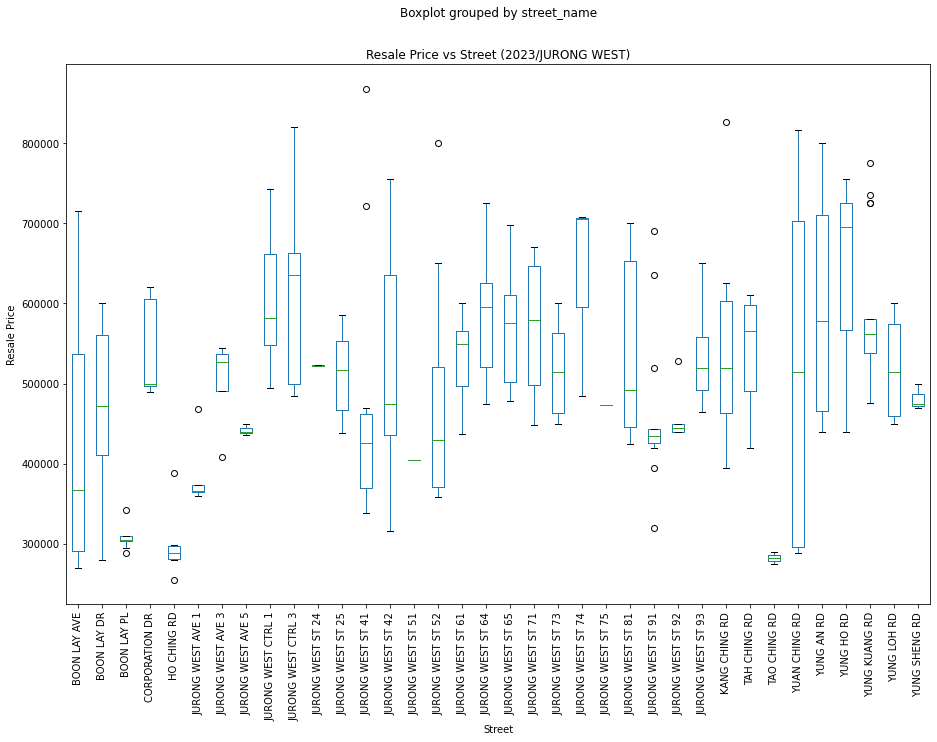

<Figure size 432x288 with 0 Axes>

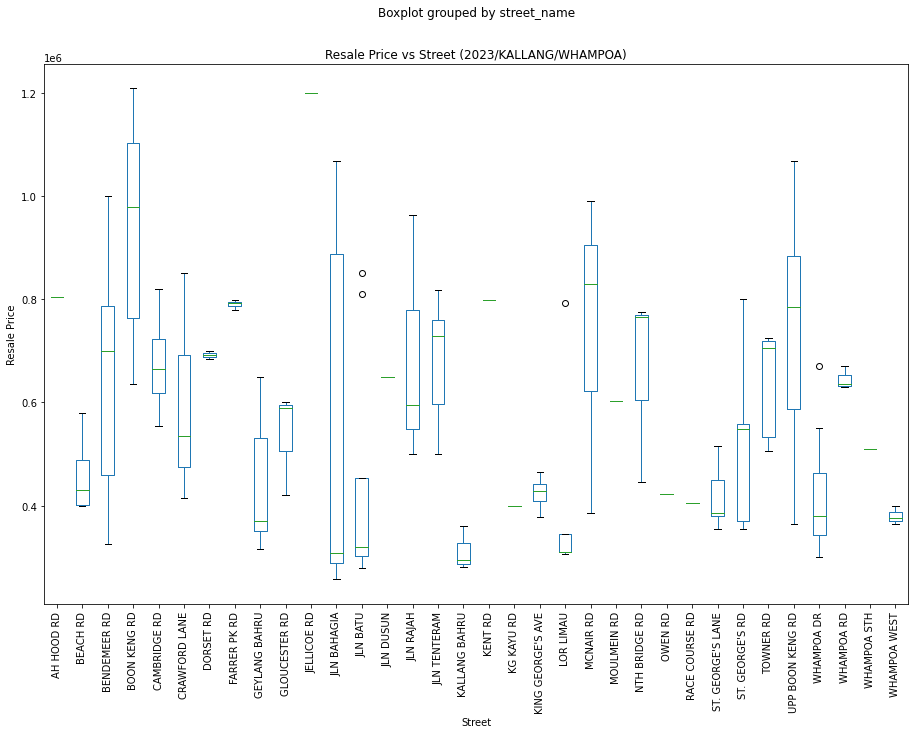

<Figure size 432x288 with 0 Axes>

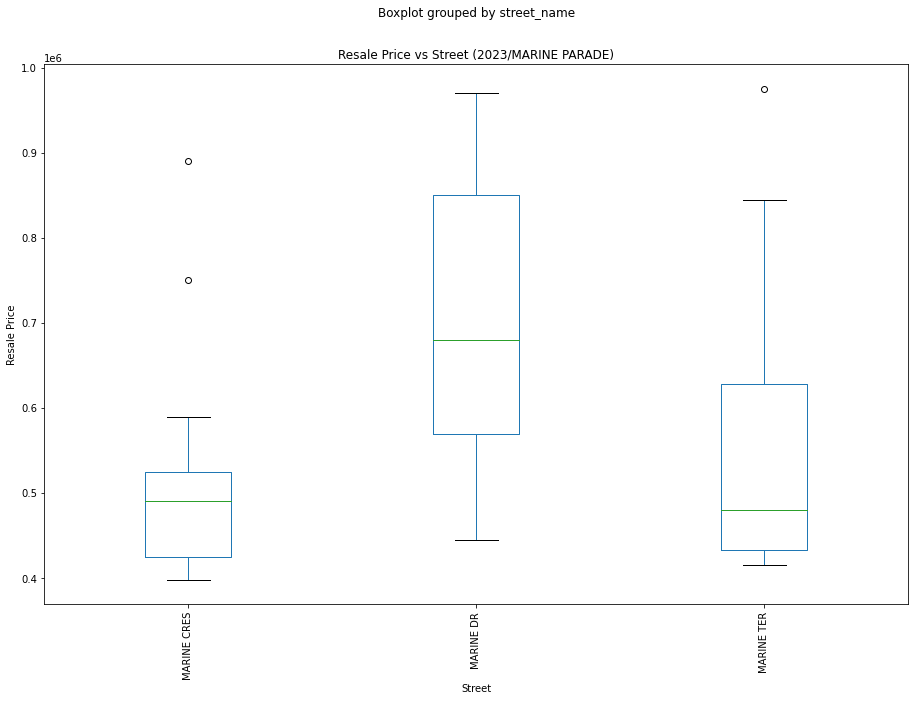

<Figure size 432x288 with 0 Axes>

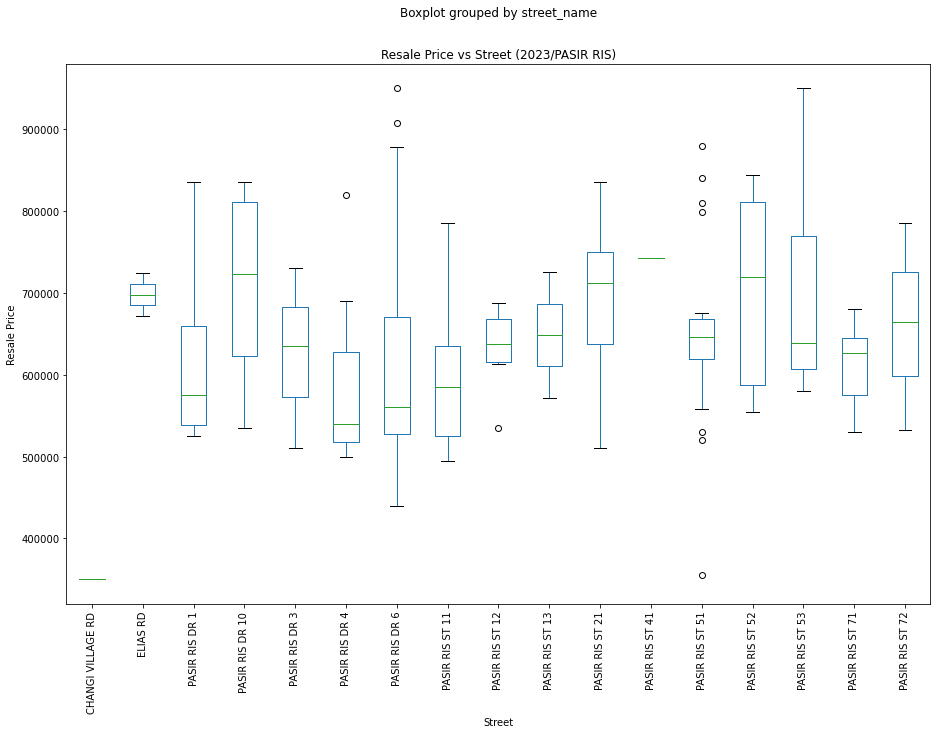

<Figure size 432x288 with 0 Axes>

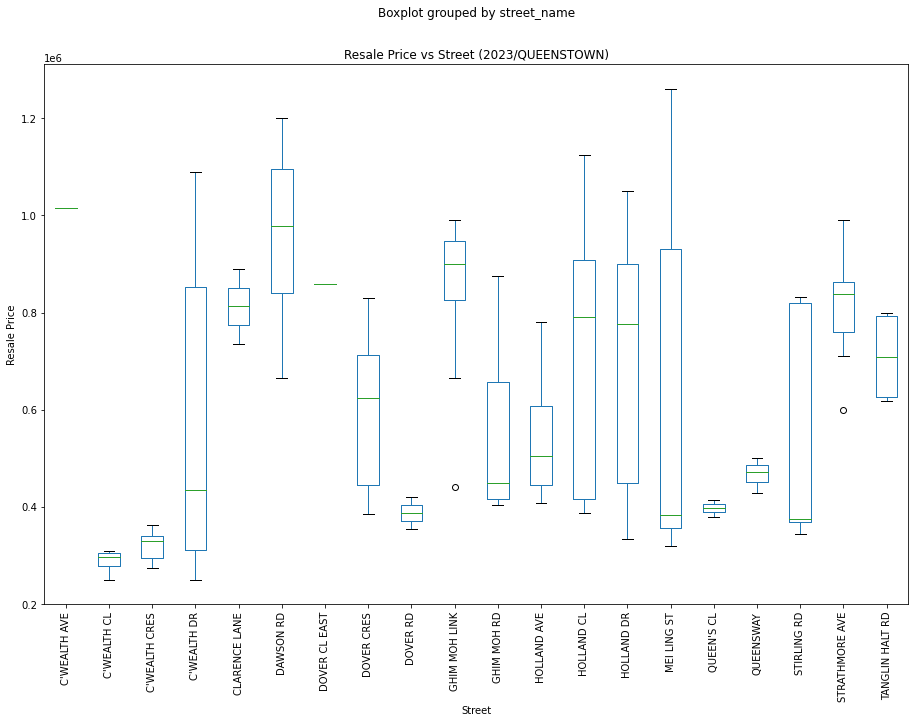

<Figure size 432x288 with 0 Axes>

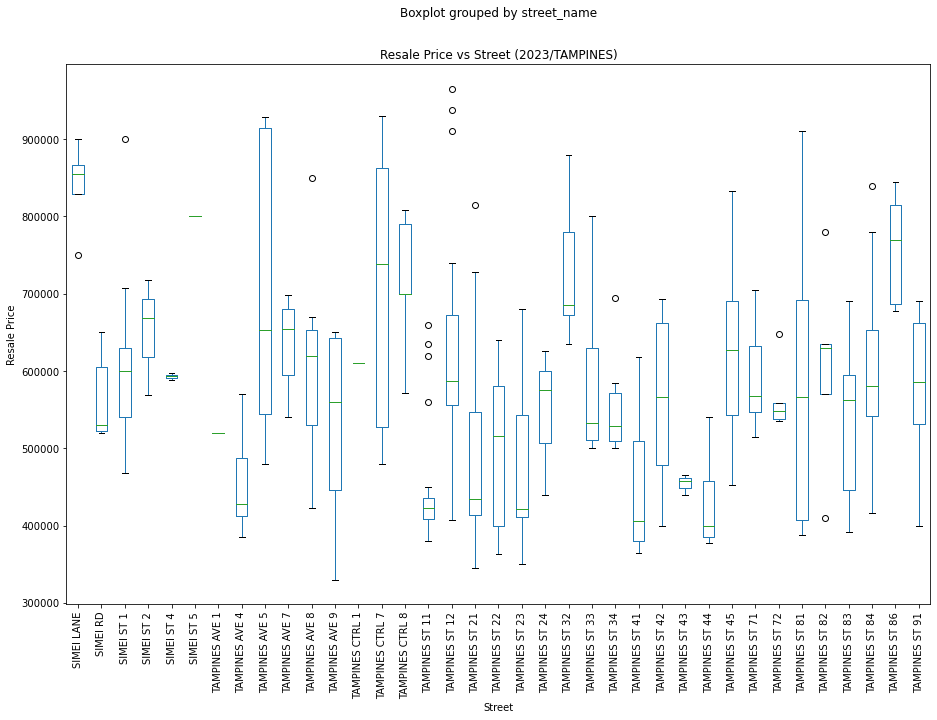

<Figure size 432x288 with 0 Axes>

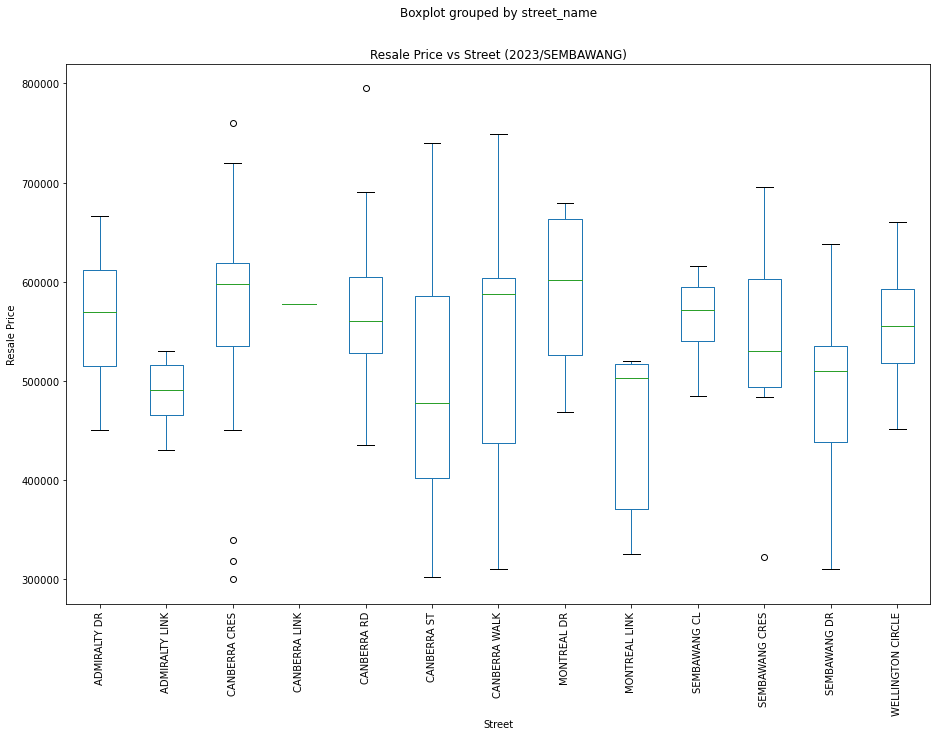

<Figure size 432x288 with 0 Axes>

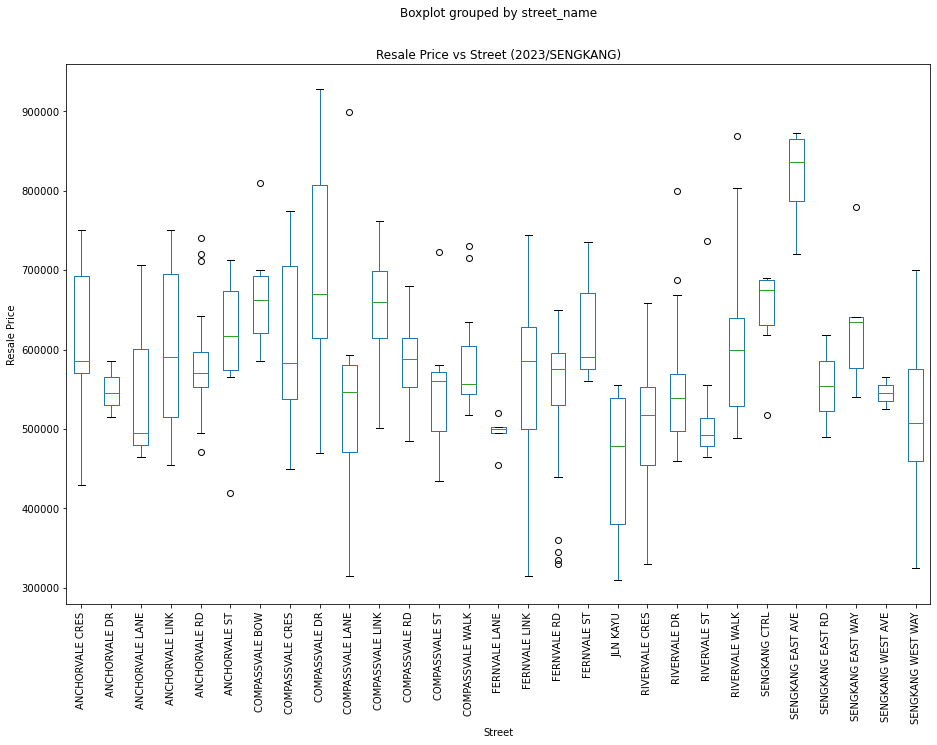

<Figure size 432x288 with 0 Axes>

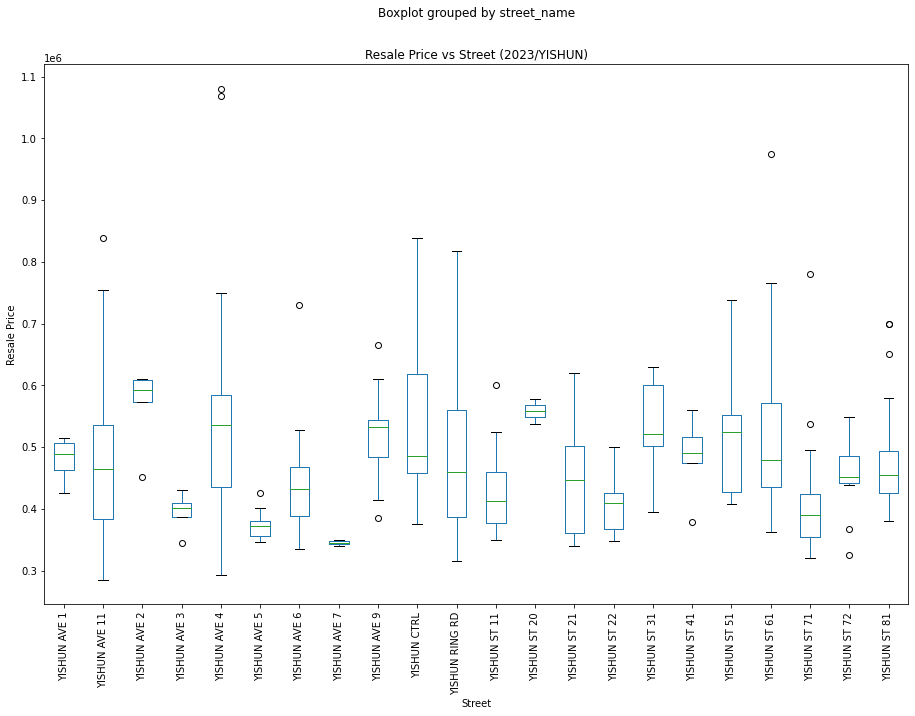

<Figure size 432x288 with 0 Axes>

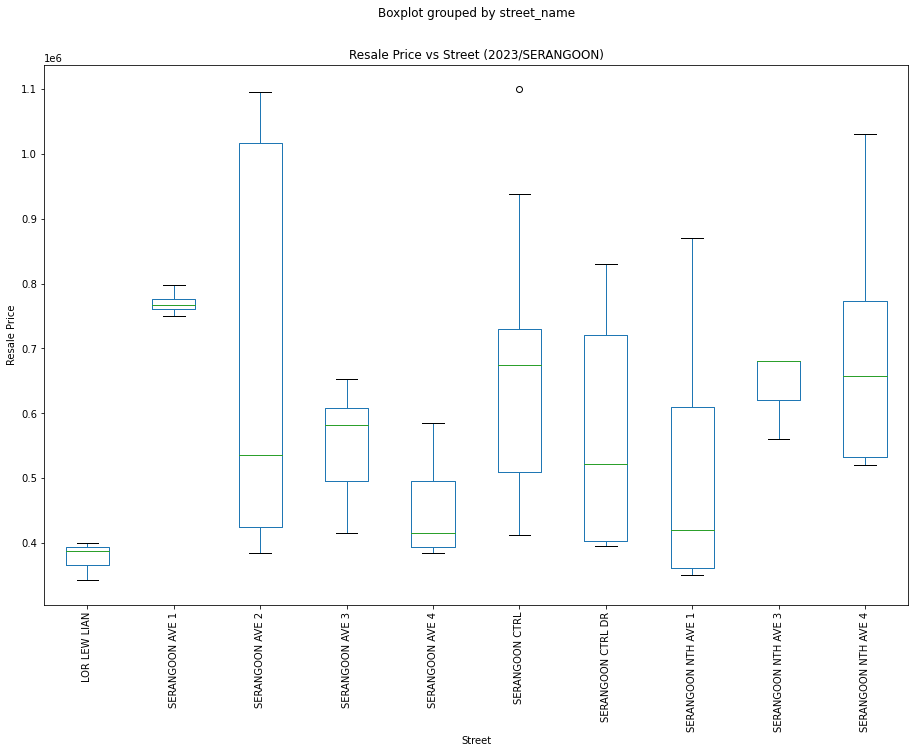

<Figure size 432x288 with 0 Axes>

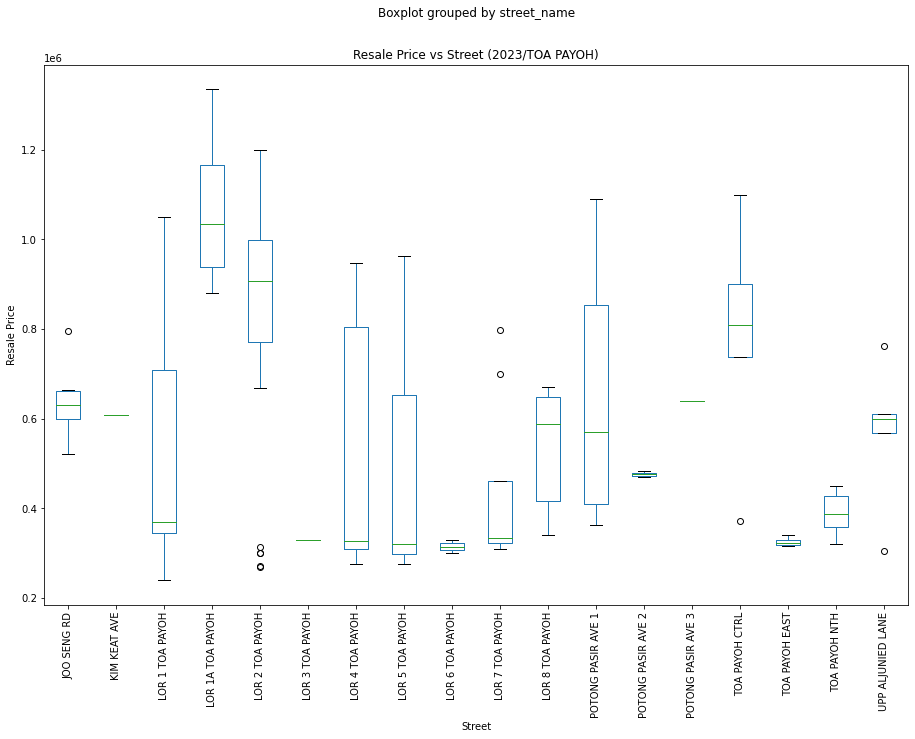

<Figure size 432x288 with 0 Axes>

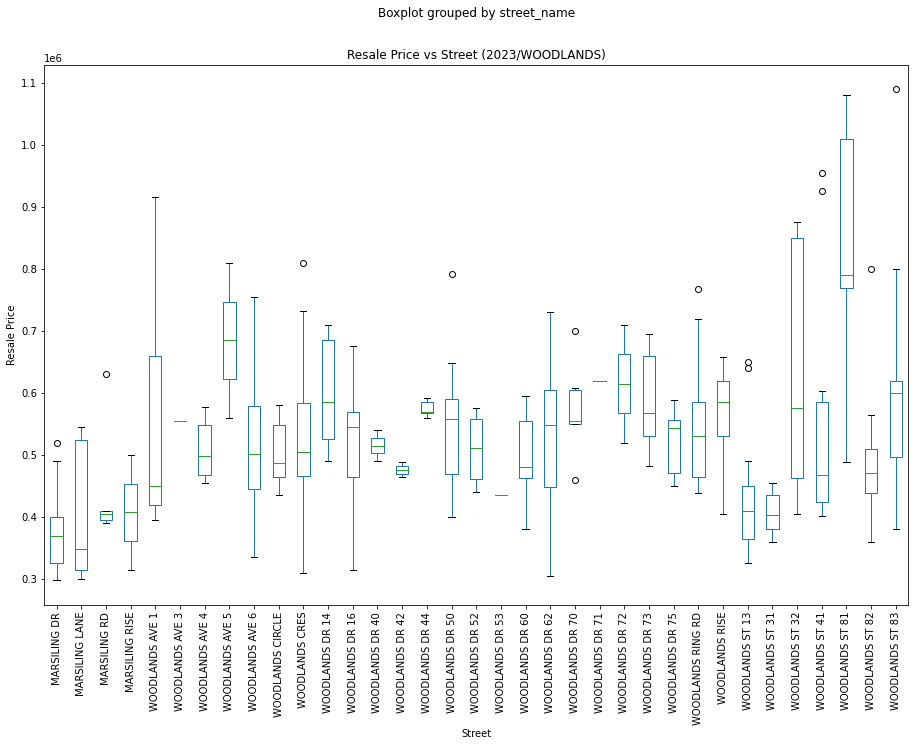

In [13]:
#Getting the street name and town graphs by year
changey={2017:df2017,2018:df2018,2019:df2019,2020:df2020,2021:df2021,2022:df2022, 2023:df2023}
whatyear=2023

y=changey[whatyear]
uniquetown=y['town'].unique()
print(y['month'].unique())

for i in uniquetown:
    bystreetdf=y.loc[df['town']==i] 
#     pricebystreet=bystreetdf.groupby('street_name')
#     display(pricebystreet)
#     newdf=pricebystreet['resale_price']
#     newdf=pricebystreet['resale_price'].unstack(level=1)
#     display(newdf)
    
    #plot the graph
    plt.clf()
    bystreetbp=bystreetdf.boxplot(by ='street_name', column =['resale_price'], grid = False, figsize =(15, 10))
#     plt.scatter(pricebystreet.index,pricebystreet['resale_price'])

    #Put aesthetics on graph
    plt.title(f'Resale Price vs Street ({whatyear}/{i})')
    plt.ylabel('Resale Price')
    plt.xlabel('Street')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=6, fancybox=True, shadow=True)
    plt.xticks(rotation=90)
    plt.show()

In [51]:
#trying xgboost

from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv('checkpoint_3.csv')
data = dataframe.values
# split data into input and output columns
X, y = data[:, :-1], data[:, -1]
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: nan (nan)


In [61]:
#Do by auspicious floor number
#Do by school proximity
#Do by mall proximity
#Do by mrt proximity

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df[['lat', 'lon']]=df['lat_lon'].str.split(',', expand=True)
df['lat'] = df['lat'].str[1:]
df['lon'] = df['lon'].str[:-1]

display(df)
df_final = df[['resale_price', 'floor_area_sqm', 'lat', 'lon', 'Leaseleft', 'closest_mrt_dist', 'closest_Pri_sch_dist', 'closest_Sec_sch_dist', ]]

# split data into train and test
resale_p = df_final['resale_price'].values
X = df_final.drop(['resale_price'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()

# the use of fit is to find the mean and variance
X_train = scaler.fit_transform(X_train)

# For the test dataset, you do not need to use fit again, as we are using the mean and variance from the train dataset
X_test = scaler.transform(X_test)

print(X_test)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,closest_mall_dist,closest_mall,num_mall_1km_radius,closest_park_dist,closest_park,num_park_1km_radius,ListingByYear,Leaseleft,lat,lon
0,0,0,0,ANG MO KIO,2 ROOM,Improved,44.0,ANG MO KIO AVE 10,232000.0,2017-01,...,1013.992058,AMK Hub,0,1032.586022,Ang Mo Kio Town Garden East,0,2017,38.0,1.36200453938712,103.853879910407
1,1,1,1,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 4,250000.0,2017-01,...,894.265975,Broadway Plaza,1,658.451197,Ang Mo Kio Town Garden West,2,2017,39.0,1.37094273993861,103.837974822369
2,2,2,2,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,262000.0,2017-01,...,1525.573038,Broadway Plaza,0,1111.238041,Ang Mo Kio Town Garden West,0,2017,37.0,1.38070883044887,103.835368226602
3,3,3,3,ANG MO KIO,3 ROOM,New Generation,68.0,ANG MO KIO AVE 10,265000.0,2017-01,...,893.795634,myVillage At Serangoon Garden,1,898.087299,Ang Mo Kio Town Garden East,1,2017,37.0,1.3662010408294,103.857200967235
4,4,4,4,ANG MO KIO,3 ROOM,New Generation,67.0,ANG MO KIO AVE 5,265000.0,2017-01,...,1569.306143,Broadway Plaza,0,1155.199842,Ang Mo Kio Town Garden West,0,2017,37.0,1.38104134784496,103.835131744823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149321,149321,149321,149321,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN CTRL,800000.0,2023-03,...,432.877723,Junction Nine,2,279.490328,Yishun Pond Park,1,2023,35.0,1.42923856240311,103.842145690691
149322,149322,149322,149322,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,800000.0,2023-03,...,931.337725,Wisteria Mall,2,661.649827,Yishun Pond Park,1,2023,35.0,1.425310512346,103.845455692599
149323,149323,149323,149323,YISHUN,EXECUTIVE,Apartment,142.0,YISHUN RING RD,770000.0,2023-03,...,739.745345,Junction Nine,1,825.343534,Yishun Pond Park,1,2023,35.0,1.42954682086043,103.847278941139
149324,149324,149324,149324,YISHUN,EXECUTIVE,Maisonette,146.0,YISHUN RING RD,818000.0,2023-03,...,965.509600,Northpoint City,1,976.514291,Sembawang Park,1,2023,36.0,1.42050037590918,103.832376118316


[[-2.64334795 -1.88464628 -0.14440164  1.88681699]
 [ 2.09729492  0.06550976  0.52966802  0.78700417]
 [ 1.97254116  0.05957597  1.6921622   0.27375819]
 ...
 [ 0.26757311 -0.35067453  1.49110427  0.93364588]
 [-0.23144193  0.48028694  0.4367445  -0.45945035]
 [ 2.01412575 -0.28730693  1.3151701   0.71368332]]


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers

def linreg(X_train, y_train, X_test, y_test):
    model_results = {}
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Linear Regression'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

def lasso(X_train, y_train, X_test, y_test):
    model_results = {}
    model = Lasso(alpha=1.0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Lasso'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

def ridge(X_train, y_train, X_test, y_test):
    model_results = {}
    model = Ridge()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Ridge'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

def decisiontree(X_train, y_train, X_test, y_test):
    model_results = {}
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results['model'] = 'Decision Tree'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results

def nn(X_train, X_test, y_train, y_test, batchsize = 128, training_epochs = 500):
    tf.keras.backend.clear_session()
    model_results = {}
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(50, activation = 'relu'))
    model.add(tf.keras.layers.Dense(50, activation = 'relu'))
    model.add(tf.keras.layers.Dense(50, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer = 'Adam', loss = 'mse')
    
    model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test), shuffle = True,
          batch_size= batchsize, epochs = training_epochs, verbose = 0)
    
    y_pred = model.predict(X_test)
    model_results['model'] = 'Neural Network'
    model_results['mae'] = metrics.mean_absolute_error(y_test, y_pred)
    model_results['mse'] = metrics.mean_squared_error(y_test, y_pred)
    model_results['accuracy'] = metrics.explained_variance_score(y_test, y_pred)
    return model_results
    
model_lr = lr(X_train, y_train, X_test, y_test)
model_lasso = lasso(X_train, y_train, X_test, y_test)
model_ridge = ridge(X_train, y_train, X_test, y_test)
model_decision = decisiontree(X_train, y_train, X_test, y_test)
model_nn = nn(X_train, X_test, y_train, y_test, batchsize = 128, training_epochs = 500)
df = pd.DataFrame([model_lr, model_lasso, model_ridge, model_decision, model_nn])

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed